In [111]:
from keras.datasets import imdb
import numpy as np
word_index = imdb.get_word_index()
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [112]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [100]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [101]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [102]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [103]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [104]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [105]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3796 - val_acc: 0.8686
Epoch 2/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8895
Epoch 3/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3086 - val_acc: 0.8710
Epoch 4/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2839 - val_acc: 0.8834
Epoch 5/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.1427 - acc: 0.9541 - val_loss: 0.2848 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3155 - val_acc: 0.8771
Epoch 7/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - 

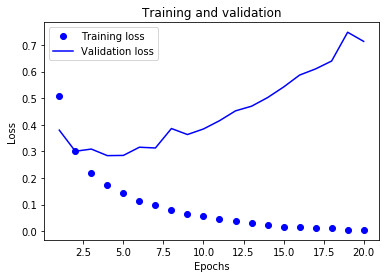

In [106]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

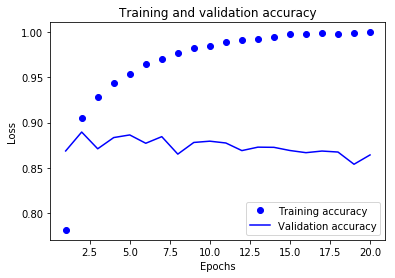

In [107]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [108]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))

model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 3s 104us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.2659 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.1983 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.1679 - acc: 0.9402


In [109]:
results = model1.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 3s 101us/step - ETA


[0.3235182568740845, 0.87332]

In [110]:
model1.predict(x_test)

array([[0.14061199],
       [0.99970406],
       [0.29775462],
       ...,
       [0.07175863],
       [0.04310416],
       [0.47099328]], dtype=float32)